

# Project: Investigating 10,000+ Movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>What makes a successful movie? what properties make a movie successful? Which genres of movies have gotten popular over the years? A lot of questions for this dataset. The dataset is gotten from Udacity which is a cleaned version of a dataset from Kaggle.
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The dataset contains 21 columns which are 'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','runtime', 'genres', 'production_companies', 'release_date','vote_count', 'vote_average', 'release_year', 'budget_adj'and 'revenue_adj'.
           
           *'id', 'imdb_id': They are the unique id's and imdb id's for each movie
           *'popularity': The popularity rating of a movie
           *'budget', 'revenue': budget and revenue of a movie
           *'original_title': The title of a movie
           *'cast','director': Contains the cast and director of a movie respectively
           *'homepage':link to the homepage of the movie
           *'tagline', 'keywords':popular words and keywords of a movie respectively
           *'runtime':length of a movie in minutes
           *'vote_count', 'vote_average':vote count and vote average of movie
           *'release_year','release_date':year and date the movie was released

           The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,
           accounting for inflation over time.

>Over the course of this report, we will be answering the following questions.
          
          *When is a movie said to be successful?
          *What properties are associated with a successful movie?
          *Which genres are most popular from year to year?



In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>This section contains a general overview of the data and contains the following:

        >checking the data for duplicates
        >checking the data for nulls
        >checking initial statistics of the data
       
### General Properties

In [2]:
#Loading dataset
movie_df=pd.read_csv('tmdb-movies.csv')

#getting the first five records of the data
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#size of the data
x,y=movie_df.shape
print(f"The dataset contains {x} rows and {y} columns")

The dataset contains 10866 rows and 21 columns


In [4]:
#checking for duplicates
duplicates=movie_df.duplicated().sum()
print(f"The data contains {duplicates} duplicate")

The data contains 1 duplicate


In [5]:
#datatypes of the columns 
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The data contains missing values in some columns - Do we drop the columns with missing values or drop the rows?

In [6]:
#percentage of missing values per column 
(movie_df.isnull().sum()/len(movie_df))*100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

More than 70% of the homepage column is missing which is the link to the respective movies
More than 25% of the tagline column, 13%  of the keywords column and 9% of the production companies.
The rest are really small and can be dropped with the removal of rows containing nulls.

In [7]:
#summary statistics
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The minimum value and median for budget and revenue is zero(0) which is a bit weird and skeptical
The minimum runtime is 0 which is something that is not logical.
The dataset needs to be cleaned to get better summary statistics


>To ensure good analysis, the issues discovered during the data wrangling process have to be fixed nd that is where data cleaning comes in. 

>Fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data will be done in this section.
### Data Cleaning 

In [8]:
#removing duplicates

movie_df=movie_df.drop_duplicates()

In [9]:
#checking for any duplicates

movie_df.duplicated().sum()

0

In [10]:
#unique values in each column of the dataset
movie_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Presence of budget and budget_adj with revenue and revenue_adj
For the course of this analysis, only the budget and revenue columns will be used.

Unique id and imdb_id for each movie and columns with the highest amount of null values are dropped from the dataset

In [11]:
#removing columns not needed for analysis
movie_df.drop(columns=['id', 'imdb_id','homepage', 'tagline', 'keywords','budget_adj',
       'revenue_adj','overview','release_date'],axis=1,inplace=True)

In [12]:
#checking the records with no production companies
movie_df[movie_df['production_companies'].isnull()].tail(50)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
9700,0.178440,0,0,Beauty and the Beast,John Savage|Rebecca De Mornay|Yossi Graber|Mic...,Eugene Marner,94,Music|Romance|Family,NaN,11,7.0,1987
9701,0.173519,0,0,No Man's Land,Charlie Sheen|Lara Harris|D. B. Sweeney|Randy ...,Peter Werner,106,Action|Drama|Thriller,NaN,11,6.6,1987
9715,0.068199,0,0,My Best Friend's Birthday,Quentin Tarantino|Allen Garfield|Craig Hamann|...,Quentin Tarantino,36,Comedy,NaN,11,5.1,1987
9717,0.063503,0,0,Hollywood Shuffle,Robert Townsend|Craigus R. Johnson|Helen Marti...,Robert Townsend,78,Comedy,NaN,12,5.1,1987
9718,0.245929,0,0,Scooby-Doo Meets the Boo Brothers,Casey Kasem|Don Messick|Sorrell Booke|Rob Paul...,Paul Sommers|Carl Urbano,94,Animation|Adventure|Comedy|Family,NaN,11,5.8,1987
9752,0.092942,0,0,Carry On... Up the Khyber,Sid James|Charles Hawtrey|Bernard Bresslaw|Ken...,Gerald Thomas,88,Comedy,NaN,11,6.4,1968
9755,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,6,Drama,NaN,12,6.7,1968
9793,0.172363,0,0,Animals Are Beautiful People,Paddy O'Byrne,Jamie Uys,92,Comedy|Documentary,NaN,10,7.4,1974
9799,0.175008,0,0,The Amputee,Catherine E. Coulson|David Lynch,David Lynch,5,NaN,NaN,11,5.0,1974
9803,0.040689,0,0,Benji,Patsy Garrett|Allen Fiuzat|Cynthia Smith|Peter...,Joe Camp,86,Adventure|Family|Romance,NaN,22,6.4,1974


Movies with no production companies have most of its budgets and revenues as zero.
It would be best to drop those rows to get clear insights



In [13]:
movie_df[movie_df['genres'].isnull()].head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,21,6.1,2015
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,13,5.0,2015
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,13,6.8,2014
1712,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,57,7.4,2009
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,11,7.0,2009


Interesting to note that records with no genres follow the same pattern as records with no production companies that is, they have most of their budgets and revenues as zero.

In [14]:
movie_df[movie_df['cast'].isnull()].head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
371,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,47,6.9,2015
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,37,8.2,2015
465,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,19,7.8,2015
536,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,12,8.0,2015
538,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,11,8.9,2015


In [15]:
#dropping rows with null values
movie_df=movie_df.dropna()

In [16]:
#checking for null values
movie_df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [17]:
x,y=movie_df.shape
print(f"The cleaned dataset contains {x} rows and {y} columns")

The cleaned dataset contains 9772 rows and 12 columns


In [18]:
movie_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


The cast, production company and genre columns contain "|" acting as a separator for the values so the columns have to be split


In [19]:
movie_df['genres'].str.split('|',expand=True)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10861,Documentary,None,None,None,None
10862,Action,Adventure,Drama,None,None
10863,Mystery,Comedy,None,None,None
10864,Action,Comedy,None,None,None


To replace the genres column, we choose the first split since it does not contain any nulls 

In [20]:
movie_df['genres']=movie_df['genres'].str.split('|',expand=True)[0]

In [21]:
movie_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [22]:
movie_df['production_companies'].str.split('|',expand=True)

,0,1,2,3,4
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films
...,...,...,...,...,...
10861,Bruce Brown Films,None,None,None,None
10862,Cherokee Productions,Joel Productions,Douglas & Lewis Productions,None,None
10863,Mosfilm,None,None,None,None
10864,Benedict Pictures Corp.,None,None,None,None


To replace the production_companies column, we choose the first split since it does not contain any nulls 

In [23]:
movie_df['production_companies']=movie_df['production_companies'].str.split('|',expand=True)[0]

In [24]:
movie_df['cast'].str.split('|',expand=True)

,0,1,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
...,...,...,...,...,...
10861,Michael Hynson,Robert August,Lord 'Tally Ho' Blears,Bruce Brown,Chip Fitzwater
10862,James Garner,Eva Marie Saint,Yves Montand,ToshirÅ Mifune,Brian Bedford
10863,Innokentiy Smoktunovskiy,Oleg Efremov,Georgi Zhzhyonov,Olga Aroseva,Lyubov Dobrzhanskaya
10864,Tatsuya Mihashi,Akiko Wakabayashi,Mie Hama,John Sebastian,Tadao Nakamaru


To replace the cast column, we choose the first split since it does not contain any nulls 

In [25]:
movie_df['cast']=movie_df['cast'].str.split('|',expand=True)[0]

In [26]:
movie_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2947,7.3,2015


In [27]:
movie_df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

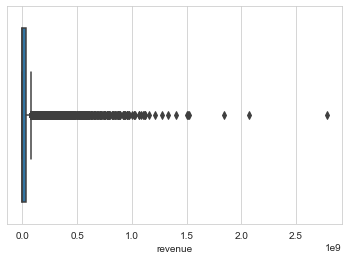

In [28]:
#boxplot to show outliers in the revenue column
sns.boxplot(x='revenue',data=movie_df);

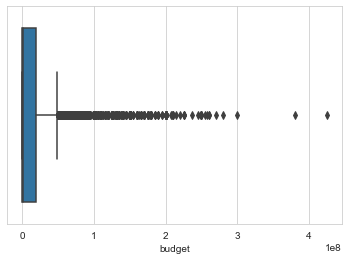

In [29]:
#boxplot to show outliers in the budget column
sns.boxplot(x='budget',data=movie_df);

Masking the data based on movie's sucesss
The basis for movie's success in this analysis is if a movie's revenue is greater than its budget


In [30]:
successful_movies=movie_df.query('revenue>budget')

In [31]:
unsuccesful_movies=movie_df.query('revenue<budget')

In [32]:
#when the revenue is equals to the budget, a break-even is achieved
break_even=movie_df.query('revenue==budget')

In [33]:
#summary statistics
movie_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


Compared to the summary statistics before cleaning, this looks more logical.

<a id='eda'></a>
## Exploratory Data Analysis

>This section contains analysis of data and answers to the questions from the introduction.

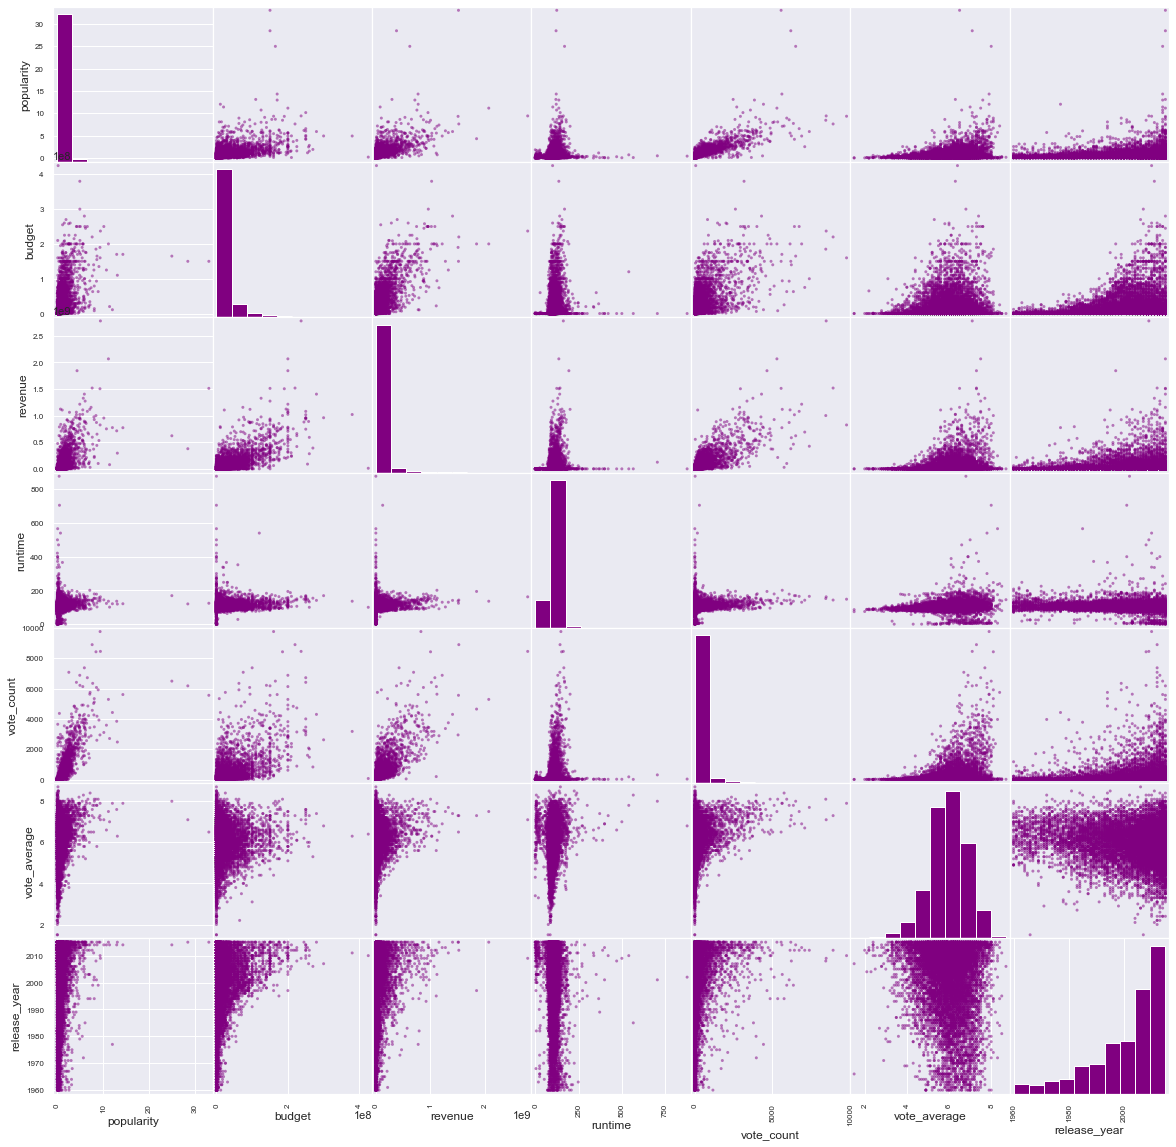

In [34]:
#plotting a scatter matrix to see relationships between variables

sns.set()
pd.plotting.scatter_matrix(movie_df,figsize=[20,20],color='purple',hist_kwds={ 'color':'purple'});

Insight: From the scatter matrix, the scatter plots of variables against our target['revenue'] shows that popularity,budget and vote_count have really high positive correlation with revenue.


### What kind of properties are associated with successful movies?

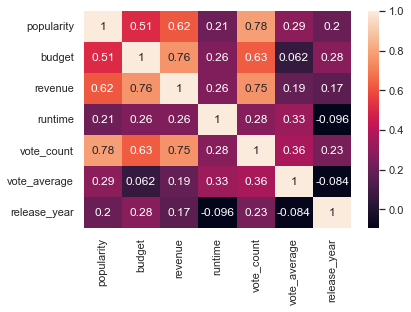

In [35]:
#A correlation heatmap of successful_movies
sns.heatmap(successful_movies.corr(),annot=True);

Insight: From the total movies data, we already observed a high correlation among popularity,budget, vote_count and revenue.
The heatmap gives a value which supports the scatter plot


 >These three variables; popularity,budget and vote_count will be looked at against revenue one after the other as a high revenue gives rise to a successful movie.

In [36]:
#defining a function to plot bar charts showing how the three variables affect a movie's success
def pl(column):
    column=str(column)
    success=successful_movies[column].mean()
    unsuccess=unsuccesful_movies[column].mean()
    be=break_even[column].mean()
    
    height=[success,unsuccess,be]
    Location=[1,2,3]

    pls=plt.bar(Location,height=height,tick_label=['successful','unsuccessful','break_even'],color='purple');
    plt.ylabel('Mean {}'.format(column))
    plt.title("Average {} per movie's success".format(column))
    return pls


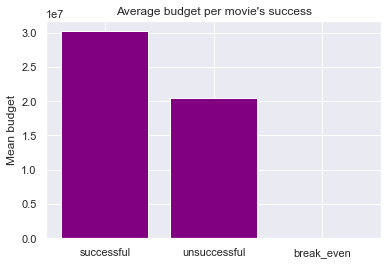

In [37]:
pl('budget');

Insight: The successful movies clearly have higher average budget than the unsuccessful movies.

The interesting thing to note is the chart doesnt show the distribution for break_even movies

In [38]:
break_even.groupby('budget').count()['revenue']

budget
0         3806
11           1
569217       1
823258       1
Name: revenue, dtype: int64

Interesting to note that 3806 movies have a budget of 0 thus explaining why the distribution didnt show

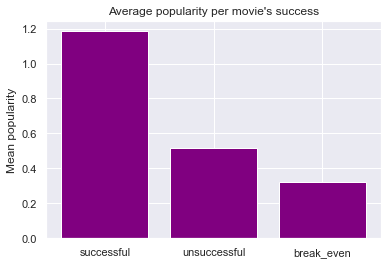

In [39]:
pl('popularity');

The average popularity of successful movies is more than twice that of the unsuccessful ones.

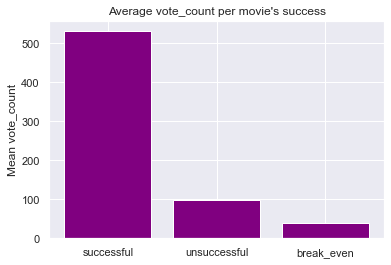

In [40]:
pl('vote_count');

Per successful movie we have more than 500 votes.

How does voting compare with popularity?

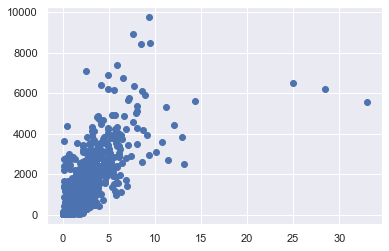

In [41]:
plt.scatter(x='popularity',y='vote_count',data=successful_movies);

Checking other variables to see its effect on successful movies

Does Production Companies affect a movie's success?

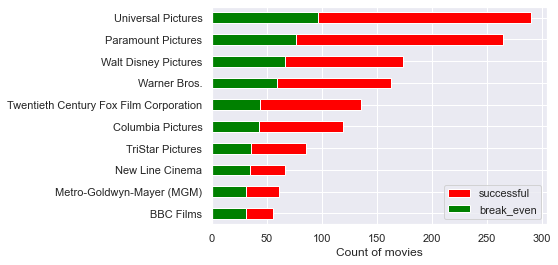

In [42]:
successful_movies['production_companies'].value_counts().head(10).sort_values().plot(kind='barh',color='red',label='successful')
break_even['production_companies'].value_counts().head(10).sort_values().head(10).plot(kind='barh',color='green',label='break_even')
plt.xlabel('Count of movies')
plt.legend();

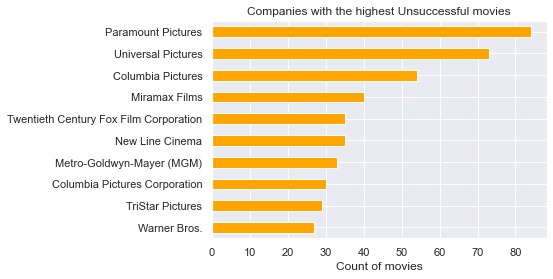

In [43]:
unsuccesful_movies['production_companies'].value_counts().head(10).sort_values().plot(kind='barh',label='unsuccessful',color='orange')
plt.xlabel('Count of movies')
plt.title('Companies with the highest Unsuccessful movies');

Maybe Production companies are not a good judge of success of movies according to our visualizations

>Do release years affect a movie's success?

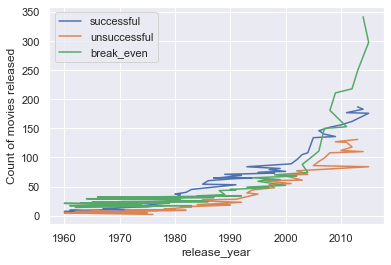

In [44]:
successful_movies['release_year'].value_counts().plot(label='successful')
unsuccesful_movies['release_year'].value_counts().plot(label='unsuccessful')
break_even['release_year'].value_counts().plot(label='break_even')
plt.xlabel('release_year')
plt.ylabel('Count of movies released')
plt.legend();

>What genre is most common among successful movies?

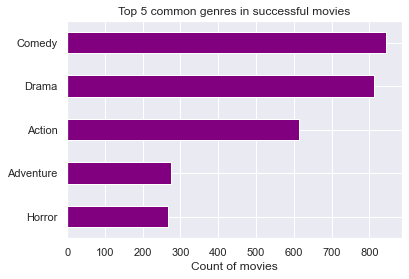

In [45]:
successful_movies['genres'].value_counts().head().sort_values().plot(kind='barh',color='purple')
plt.xlabel('Count of movies')
plt.title('Top 5 common genres in successful movies');


>Guess what? It is not Action! It is Comedy!!

Successful Movies Per Decade Per Top 5 Genre Per Popularity

In [46]:
successful_movies['decade']=(successful_movies['release_year']//10)*10

C:\Users\User\AppData\Local\Temp\ipykernel_17640\2849359739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_movies['decade']=(successful_movies['release_year']//10)*10


In [47]:
#getting the dataframe containing just the top 5 genres
top_genres=successful_movies.query('genres in ["Horror","Adventure","Action","Drama","Comedy"]')

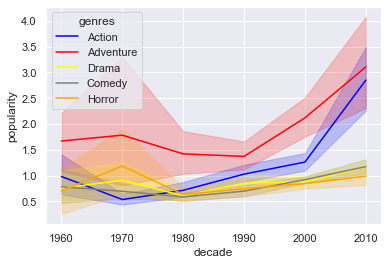

In [48]:
sns.lineplot(data=top_genres, x="decade", y="popularity",hue="genres", palette=['blue', 'red', 'yellow', 'grey','orange']);


In [49]:
successful_movies.groupby((successful_movies.release_year//10)*10).mean()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,decade
release_year,,,,,,,,
1960,0.958478,5.141495e+06,3.969709e+07,128.586667,230.786667,6.804000,1964.466667,1960.0
1970,0.895446,5.143353e+06,6.184478e+07,114.732143,276.863095,6.641071,1975.226190,1970.0
1980,0.741825,8.476912e+06,5.501265e+07,105.109827,213.795761,6.200771,1985.161850,1980.0
1990,0.931789,2.545143e+07,1.055293e+08,110.251397,363.585196,6.190363,1994.733240,1990.0
2000,1.153377,4.016967e+07,1.317484e+08,108.358714,549.350254,6.176904,2005.071066,2000.0
2010,1.679022,3.882996e+07,1.371199e+08,106.545629,846.015370,6.250432,2012.568684,2010.0


### Which genres are most popular from year to year?

In [50]:
movie_df['release_year'].nunique()

56

The data has 56 different years!!

Year by Year analysis will be exhausting so the analysis is done by decades 

In [51]:
#defining a function to help plot bars showing the Top genres per year
def plot(year):
    plots=movie_df.query("release_year=={}".format(year)).groupby('genres').mean()['popularity'].sort_values().plot(kind='barh')
    plt.xlabel('Average Popularity')
    plt.ylabel('Genres')
    plt.title('Popular movies in {}'.format(year))
    
    return plots

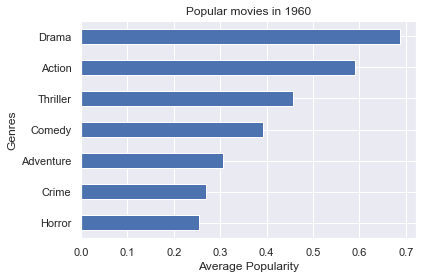

In [52]:
plot(1960);

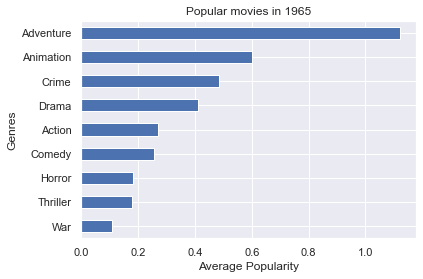

In [53]:
plot(1965);

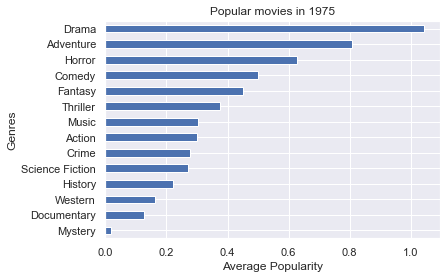

In [54]:
plot(1975);

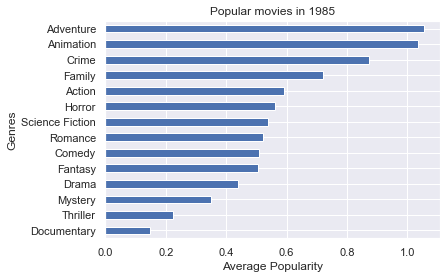

In [55]:
plot(1985);

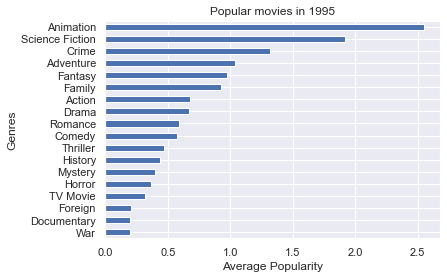

In [56]:
plot(1995);

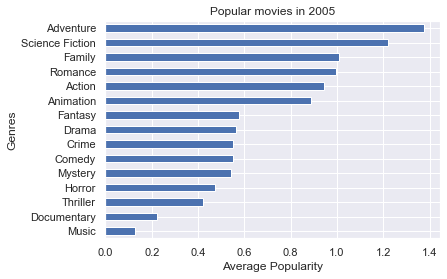

In [57]:
plot(2005);

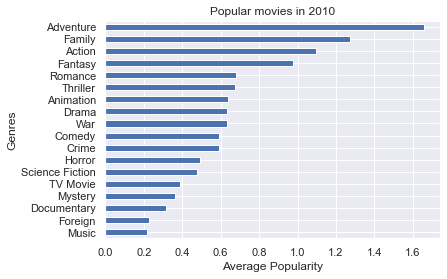

In [58]:
plot(2010);

The genre in terms of Popularity is ...

<a id='conclusions'></a>
## Conclusions



    *Popularity, vote_counts and budgets affect a movie's success. 

    *A higher budget leads to higher revenue. 

    *High Popularity leads to a greater audience who is willing to pay to watch the movie thus generating money. 

    *Surprisingly, there is little or no correlation between runtime and revenue as well as popularity.Therefore, inorder to create a successful movie, popularity is one thing to ensure happens. 

    *The Top genres for successful movies are Horror, Action, Comedy, Drama and Adventure.

    *The change in the popularity of Adventure movies is something worthy to note of from 1960 to 1965.
    
    *According to the dataset, Adventure wins the most popular genre for successful movies.

Limitations

    *The removal of rows with null values may have affected the insights of the data.

    *The splitting of the genres,cast and production companies column and taking the one without nulls might have affected the analysis in terms of losing information.
    
    *The number of rows with budgets and revenue as 0 may have indirectly affected the analysis.